# Laboratorio 5 - Parte 2

### Máquinas de Vectores de Soporte

### 2019-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co

## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

#### Primer Integrante: Santiago Alexis Sanchez Zuleta
#### Segundo Integrante: Raul Andres Gomez Ramirez

In [4]:
from __future__ import division
import numpy as np
import math
import matplotlib.pyplot as plt
#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")
%matplotlib inline

## Ejercicio 1

En este ejercicio usaremos la regresión por vectores de soporte para resolver el problema de regresión de la base de datos AirQuality (https://archive.ics.uci.edu/ml/datasets/Air+Quality).

La siguiente celda de código limpia la base de datos de todos sus datos faltantes y la deja lista en la variable DataBase.

In [5]:
#cargamos la bd de entrenamiento
db = np.loadtxt('BDatos/AirQuality.data',delimiter='\t')  # Assuming tab-delimiter
print ("Dim de la base de datos original: " + str(np.shape(db)))
db = db.reshape(9357,13)
DataBase = db
#La base d edatos AirQuality tiene muchos valores perdidos, vamos a quitar todos esos registros de la base de datos
#Están marcados como -200. Donde haya un valor -200 eliminaremos el registro.
j = 0
for i in range(0,np.size(db,0)):
    if -200 == db[i,12]:
        #print i
        j+=1
        DataBase = np.delete(DataBase,i,0)
    
print ("\nHay " + str(j) + " valores perdidos en la variable de salida. :(")

print ("\nDim de la base de datos sin las muestras con variable de salida perdido "+ str(np.shape(DataBase)))

#Ya hemos eliminado los registros con valor de la variable de salida perdido.

#Ahora vamos a imputar los valores perdidos en cada una de las características
print( "\nProcesando imputación de valores perdidos en las características . . .\n")

#data = open("AirQuality_cleaned.data", "w")

for k in range(0,np.size(DataBase,0)):
    for w in range(0,13):
        if -200 == DataBase[k,w]:
            DataBase[k,w] = round(np.mean(DataBase[:,w]))
        
    #data.write(str(DataBase[k,:]))

#data.close()
print ("Imputación finalizada.\n")

hay_missed_values = False
for i in range(0,np.size(DataBase,0)):
    if -200 in DataBase[i,:]:
        hay_missed_values = True
if(hay_missed_values):
    print ("Hay valores perdidos")
else:
    print ("No hay valores perdidos en la base de datos. Ahora se puede procesar. La base de datos está en la variable DataBase")

Dim de la base de datos original: (9357, 13)

Hay 366 valores perdidos en la variable de salida. :(

Dim de la base de datos sin las muestras con variable de salida perdido (8991, 13)

Procesando imputación de valores perdidos en las características . . .

Imputación finalizada.

No hay valores perdidos en la base de datos. Ahora se puede procesar. La base de datos está en la variable DataBase


In [6]:
 X = DataBase[:,0:12]

Y = DataBase[:,12]

Definimos la función

In [7]:
#Mean Absolute Percentage Error para los problemas de regresión
def MAPE(Y_est,Y):
    ind = Y != 0 #Remueve los elementos que son cero en la variable deseada
    N = np.size(Y[ind])
    mape = np.sum(abs((Y_est[ind].reshape(N,1) - Y[ind].reshape(N,1))/(Y[ind].reshape(N,1)+np.finfo(np.float).eps)))/N
    return mape 

Complete el código siguiente para usar la regresión por vectores de suporte usando la librería sklearn. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [21]:
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.svm import SVR
import time
tiempo_i = time.time()

#Complete el código para crear el modelo SVM para regresión. 
#Use un kernel rbf con una malla de valores así: C en {0.1, 100} y gamma en {0.0001, 0.1}
#kernel = 'rbf'
#C = 100
#gamma = 1

#clf = ...


#Implemetamos la metodología de validación cross validation con 10 folds

Folds =5
#percent_vector_mean = np.zeros(Folds)
Errores = np.ones(Folds)
j = 0
kf = KFold(n_splits=Folds)
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]  
       
    #Complete el código
    standardization = preprocessing.StandardScaler().fit(X_train)
    X_train = standardization.transform(X_train)
    X_test = standardization.transform(X_test)
    C = 0.1
    kernel = 'rbf'
    gamma = 0.01
    model = SVR(kernel=kernel, gamma=gamma, C=C)
    
    # Entrenar el modelo
    #modelo = ...
    #clf = SVR(kernel,gamma,C)
    model = model.fit(X_train, y_train)
  
   
    # Validación del modelo
    ypred = model.predict(X_test)
 
    Errores[j] = MAPE(ypred, y_test)
    j+=1
    
print("\nError de validación: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))

print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.")


Error de validación: 0.1474991396673567 +/- 0.03821109122787157


Tiempo total de ejecución: 3.751047372817993 segundos.


## Ejercicio 2

Una vez complete el código, realice las simulaciones necesarias para llenar la tabla siguiente:

In [9]:
 def simulacion(Kernel,C,Gamma):
      tiempo_i = time.time()
      kernel = Kernel
      C = C
      gamma = Gamma
    
      #Implemetamos la metodología de validación cross validation con 10 folds

      Folds = 5
      percent_vector_mean = np.zeros(Folds)
      Errores = np.ones(Folds)
      j = 0
      kf = KFold(n_splits=Folds)
      for train_index, test_index in kf.split(X):
          
          X_train, X_test = X[train_index], X[test_index]
          y_train, y_test = Y[train_index], Y[test_index]  
            
          #Complete el código
          standardization = preprocessing.StandardScaler().fit(X_train)
          X_train = standardization.transform(X_train)
          X_test = standardization.transform(X_test)
          
          
          # Entrenar el modelo
          #modelo = ...
          if kernel == 'lineal':
            kernel= 'linear'
          if gamma == 0:
            gamma='auto'
            
          clf = SVR(kernel=kernel,gamma=gamma,C=C)
          model = clf.fit(X_train, y_train)
        
          
          # Validación del modelo
          ypred = model.predict(X_test)

          #Porcentaje de vectores
          percent_vector = model.support_vectors_
          percent_vector_mean[j] = percent_vector.size/X_train.size

          Errores[j] = MAPE(ypred, y_test)
          j+=1
          

          
      print("\nvalores: KErnel " + str(kernel) + "  C " + str(C)+" gama :"+ str(Gamma))
      print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.")
      print("\valores  media:  " + str(np.mean(Errores)) + "  esperanza  " + str(np.std(Errores))+" porcentaje  :"+ str(np.mean(percent_vector_mean)))

      
      return str(np.mean(Errores)), str(np.std(Errores)), str(np.mean(percent_vector_mean))

In [15]:
import pandas as pd
#import qgrid
df_types = pd.DataFrame({ 
    'Kernel' : pd.Series(['lineal','lineal','lineal','lineal','lineal','lineal','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf']),
    'C' : pd.Series([0.001,0.01,0.1,1,10,100,0.001,0.001,0.001,0.01,0.01,0.01,0.1,0.1,0.1,1,1,1,10,10,10,100,100,100]),
    'gamma' : pd.Series([0,0,0,0,0,0,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1])})
    #'Kernel' : pd.Series(['rbf']),
    #'C' : pd.Series([100]),
    #'gamma' : pd.Series([1])
    # })
df_types["MAPE Promedio"] = ""
df_types["Intervalo de confianza"] = ""
df_types["% de Vectores de Soporte"] = ""
df_types.set_index(['Kernel','C','gamma'], inplace=True)
k=0
for i in df_types.index:
    mape,Ic,percent=simulacion(i[0], i[1], i[2])
    
    df_types["MAPE Promedio"][i] = mape
    df_types["Intervalo de confianza"][i] = Ic
    df_types["% de Vectores de Soporte"][i] = percent
    print("valor de i : "+str(i))
    k=k+1

#df_types["MAPE Promedio"][23] = "0.2259"
#df_types["Intervalo de confianza"][23] = "0.1109"
#df_types["% de Vectores de Soporte"][23] = "0.2191"
#df_types.sort_index(inplace=True)
#qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
#qgrid_widget


valores: KErnel linear  C 0.001 gama :0.0


Tiempo total de ejecución: 3.773738384246826 segundos.
alores  media:  0.21532161504323985  esperanza  0.06460100562932213 porcentaje  :0.3786300277723352
valor de i : ('lineal', 0.001, 0.0)

valores: KErnel linear  C 0.01 gama :0.0


Tiempo total de ejecución: 4.8872599601745605 segundos.
alores  media:  0.24490897173183038  esperanza  0.0962859267563447 porcentaje  :0.37665612594249104
valor de i : ('lineal', 0.01, 0.0)

valores: KErnel linear  C 0.1 gama :0.0


Tiempo total de ejecución: 11.49769115447998 segundos.
alores  media:  0.27680077418621385  esperanza  0.13461740462666608 porcentaje  :0.384970000032475
valor de i : ('lineal', 0.1, 0.0)

valores: KErnel linear  C 1.0 gama :0.0


Tiempo total de ejecución: 51.61642861366272 segundos.
alores  media:  0.2869582909645992  esperanza  0.15071982828475336 porcentaje  :0.38622128608226974
valor de i : ('lineal', 1.0, 0.0)

valores: KErnel linear  C 10.0 gama :0.0


Tiempo total de ej

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [16]:
df_types

MAPE Promedio Intervalo de confianza  \
Kernel C       gamma                                               
lineal 0.001   0.00   0.21532161504323985    0.06460100562932213   
       0.010   0.00   0.24490897173183038     0.0962859267563447   
       0.100   0.00   0.27680077418621385    0.13461740462666608   
       1.000   0.00    0.2869582909645992    0.15071982828475336   
       10.000  0.00    0.2866052170692736     0.1500497705716069   
       100.000 0.00   0.28853639336068776     0.1531772568363643   
rbf    0.001   0.01   0.40149213855950106    0.20620107233468235   
               0.10    0.3285171161868212    0.14022405087833348   
               1.00    0.4905252936086666    0.28594350839964744   
       0.010   0.01    0.1830244451805043     0.0380779512969904   
               0.10    0.1792828703516775    0.05056250778672696   
               1.00    0.3905585218583519    0.23416305674543042   
       0.100   0.01    0.1474991396673567    0.03821109122787157   
               0.10    0.1499473954045052   0.054459046130068585   
               1.00   0.26858280368586335     0.1504053866869833   
       1.000   0.01   0.20443133125267948    0.18742060480901732   
               0.10   0.19166755765933371    0.14041298551363568   
               1.00   0.23787662010514787    0.12997619659073503   
       10.000  0.01    0.5590061928758729     0.9123220758887024   
               0.10   0.18029619223187465     0.1709242151764691   
               1.00   0.22261295327352126     0.1082996443994473   
       100.000 0.01    0.6903611071317131     1.2096633519402977   
               0.10    0.2141462631423802    0.20358091596387595   
               1.00    0.2259390395748797    0.11094914643434282   

                     % de Vectores de Soporte  
Kernel C       gamma                           
lineal 0.001   0.00        0.3786300277723352  
       0.010   0.00       0.37665612594249104  
       0.100   0.00         0.384970000032475  
       1.000   0.00       0.38622128608226974  
       10.000  0.00       0.38633249759104876  
       100.000 0.00        0.3863047005129662  
rbf    0.001   0.01        0.7470254652163836  
               0.10         0.642560272493326  
               1.00         0.769381251732968  
       0.010   0.01        0.4433882697412993  
               0.10        0.2780009478069072  
               1.00        0.5615628615263233  
       0.100   0.01       0.19049660040575228  
               0.10        0.1517632587423164  
               1.00       0.26901942192284023  
       1.000   0.01       0.12203941014832273  
               0.10       0.16574939530723465  
               1.00       0.21668909892156618  
       10.000  0.01       0.16377644839787536  
               0.10       0.10440963336156599  
               1.00        0.2132966955730505  
       100.000 0.01       0.10210253387184147  
               0.10       0.10460419744384411  
               1.00       0.21910801302774435

3.1 ¿Cuál es la finalidad de usar las funciones kernel en el modelo SVM?

R/: Nos permite convertir un problema que no tiene solución lineal en un problema que tiene solucion lineal en un espacio de dimensión mayor.


3.2 ¿En este caso el porcentaje de vectores de soporte provee una información similar que en el problema de clasificación? Explique su respuesta.

R/:Los vectores de soporte son los que dan el margen donde el error es cero lo que acompañado del porcentaje de vectores nos dice sobre el sobre ajuste lo que ocurria tambien en la clasificación.


3.3 Realice una gráfica de las salidas reales vs las predicciones del modelo SVM, para evaluar visualmente el desempeño del mismo. Esto solo para la configuración en la cuál se encontró el menor error.

Complete el código para hacer la gráfica aquí

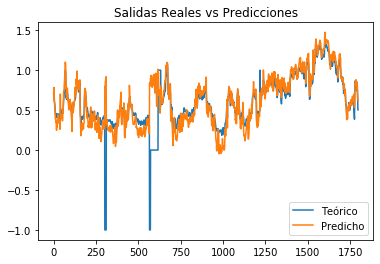

In [30]:

plt.title('Salidas Reales vs Predicciones')
plt.plot(y_test)
plt.plot(ypred)
plt.legend(['Teórico', 'Predicho'], loc=4)
plt.plot(figsize=(3000,3000))
plt.show()